## An Exploration of UN data
In this project, you'll be doing some exploratory analysis on two country-level metrics, gross domestic product (GDP) per capita and overall life expectancy. After completing the guided practice section, you will have a chance to find some additional data and do some more exploring of your own.

### Guided Practice:

1.	Download the Gross Domestic Product (GDP) per capita dataset from [http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD). Rename it to gdp_per_capita.csv and place it in the `data` folder of your project repository.

2. Create a Jupyter Notebook in the `notebooks` folder and name it `UN_Data_Exploration`.
    *  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
    * Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. [Here](https://www.markdownguide.org/cheat-sheet/) is a link to a cheat sheet showing the basics of styling text using Markdown.

3.	In the first cell of your notebook, import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`
    
    Keep all imports in this cell at the top of your notebook.

    Imported UN data sets on 10/03/2024 from [http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD)

In [84]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

4.	Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. After reading it in, inspect the first 10 rows and then inspect the last 10 rows. 

5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'. 
    - Removed column Value Footnotes due to all values being NaN. 
    - Renamed column names from Country or Area to Country and Value to GDP_Per_Capita

In [85]:
# combining the csv read, drop column, and column rename 
gdp_df = (
    pd.read_csv('../data/gdp_per_capita.csv')
    .drop(columns = ['Value Footnotes'])
    .rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
)
continents = pd.read_csv('../data/continents.csv')
gdp_df.head(10)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
5,Afghanistan,2016,2101.422187
6,Afghanistan,2015,2108.714173
7,Afghanistan,2014,2144.449634
8,Afghanistan,2013,2165.340915
9,Afghanistan,2012,2122.830759


In [86]:
gdp_df.tail(10)

,Country,Year,GDP_Per_Capita
7652,Zimbabwe,1999,2866.032886
7653,Zimbabwe,1998,2931.725144
7654,Zimbabwe,1997,2896.147308
7655,Zimbabwe,1996,2867.026043
7656,Zimbabwe,1995,2641.378271
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843
7661,Zimbabwe,1990,2704.757299


6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.
    - rows: 7662
    - columns: 3
    - data types: 
        - country - object, 
        - year - int64, 
        - gdp_per_capita - float64
    - I had to change year to a string, in an question further down I could not create the 2021 data set with it being an interger. I seem to be the only one who had an issue with that (I this happened in the orginal and cleaned up notebook)

In [129]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   object 
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), object(2)
memory usage: 179.7+ KB


In [128]:
# changing year to a string, had an issue with it 
gdp_df['Year'] = gdp_df['Year'].astype(str)

7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?
    - Years in the data set are from 1990 to 2022
    - The number of observations per year were increasing until 2013 where it stays the same till 2020, then decreases in 2021 to 241, and again in 2022 to 232. 


In [120]:
gdp_df['Year'].value_counts().sort_index()

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Name: count, dtype: int64

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?
    - There 242 areas in the countries column. Not all of the places are actual countries some are areas. 
    - The top five least represent are: Djibouti, Somalia, Turks and Caicos Islands, Sint Maarten (Dutch part), and Kosovo. 
    - Some of them may have been added to the UN during the time frame so they would not have reported numbers in years they were not members.
    - For Saint Maarten and Turks and Caicos, unsure if they are individual countries or terrority of a country, thinking in some years they may report independent and others roll up into the home country.

In [111]:
gdp_df['Country'].unique()
# this gives different country names

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', "CÃ´te d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
 

In [109]:
gdp_df['Country'].nunique()
# how many countries 

242

In [110]:
gdp_df['Country'].value_counts(ascending = True).head(5)
# fewest reported countries 

Country
Djibouti                     10
Somalia                      10
Turks and Caicos Islands     12
Sint Maarten (Dutch part)    14
Kosovo                       15
Name: count, dtype: int64

9. Create a new dataframe by subsetting `gdp_df` to just the year 2021. Call this new dataframe `gdp_2021`.

In [134]:
gdp_2021 = gdp_df.loc[gdp_df['Year'] == '2021']
# this is where I had to change to a string it was not subsetting with using it as in integer (using 2021 instead of '2021')

10. Use `.describe()` to find the summary statistics for GDP per capita in 2021. 

In [137]:
gdp_2021['GDP_Per_Capita'].describe()

count       241.000000
mean      20711.570080
std       20916.978968
min         714.066712
25%        5044.196028
50%       13754.802423
75%       30974.370692
max      115683.493708
Name: GDP_Per_Capita, dtype: float64

11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?
    - Shape is right skewed

<Axes: title={'center': 'GDP Per Capita in 2021'}, xlabel='GDP Per Capita', ylabel='Number of Countries'>

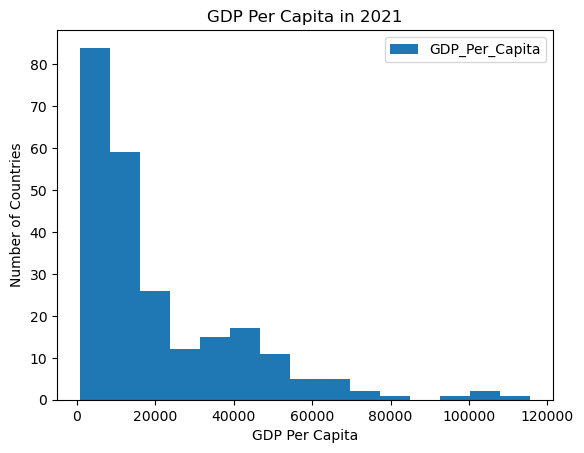

In [150]:
gdp_2021.plot(kind = 'hist', 
              bins = 15, 
              title = 'GDP Per Capita in 2021',
              xlabel = 'GDP Per Capita',
              ylabel = 'Number of Countries'
            )

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.
    - The top five countries by GCP per Capita are: Luxembourg, Singapore, Ireland, Qatar, and Bermuda	
    - The bottom five countries by GDP per Capita are: Burundi, Central African Republic, Dem. Rep. Congo, Somalia, and Niger

In [156]:
gdp_2021.sort_values('GDP_Per_Capita', ascending = False).head()

,Country,Year,GDP_Per_Capita
4147,Luxembourg,2021,115683.493708
6107,Singapore,2021,107741.118436
3278,Ireland,2021,102785.490239
5745,Qatar,2021,92862.571798
680,Bermuda,2021,78570.489515


In [157]:
gdp_2021.sort_values('GDP_Per_Capita').head()

,Country,Year,GDP_Per_Capita
972,Burundi,2021,714.066712
1216,Central African Republic,2021,837.504686
1629,Dem. Rep. Congo,2021,1073.643271
6272,Somalia,2021,1136.735989
5073,Niger,2021,1186.576809


13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2021 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named `gdp_pivoted`.

In [205]:
gdp_pivoted = gdp_df.pivot_table(
    index = 'Country',
    columns = 'Year',
    values = 'GDP_Per_Capita'
).dropna(subset=['1990', '2021'])

14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [206]:
gdp_pivoted['Percent_Change'] = 100 * ((gdp_pivoted['2021'] - gdp_pivoted['1990'] )/ gdp_pivoted['1990'])

15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?
    - 19 countries experienced a negative percentage change in GDP from 1990 to 2021.

In [207]:
(gdp_pivoted['Percent_Change'] < 0).sum()

19

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2022. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.  
**Extra Bonus:** Don't hard code the countries in.
    - The country with the highest change is Equatorial Guinea. 
    - The country with the second highest change is China. 
    - China had a gradual increase over the years and Equarorial Guinea had a pretty significant increase and then started decreasing.

In [208]:
gdp_pivoted['Percent_Change'].nlargest(2)

Country
Equatorial Guinea    1463.081870
China                1140.082904
Name: Percent_Change, dtype: float64

In [339]:
# saving the top two countries to have a reusable list and not hard code the countries in
top_two = gdp_pivoted['Percent_Change'].nlargest(2)
# could not do .index.tolist() in the last one so saved to a different variable.
top_two_change = top_two.index.tolist()

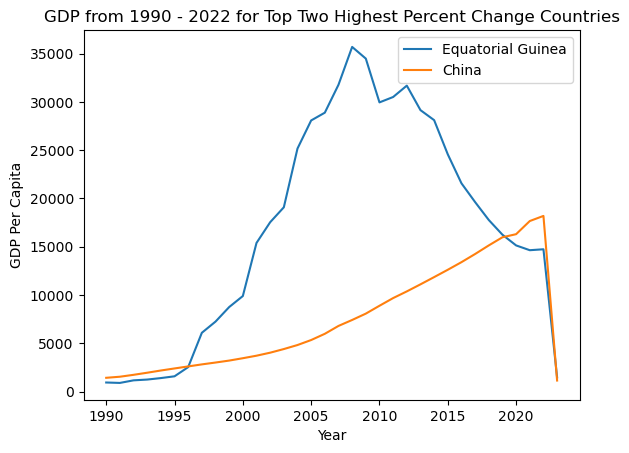

In [345]:
gdp_pivoted.loc[top_two_change[0]].plot(kind = 'line')
gdp_pivoted.loc[top_two_change[1]].plot(kind = 'line')
plt.title('GDP from 1990 - 2022 for Top Two Highest Percent Change Countries')
plt.legend()
plt.ylabel('GDP Per Capita')
plt.show()

17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

In [215]:
continents = pd.read_csv('../data/continents.csv')

18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [316]:
gdp_df2 = pd.merge(
    left = gdp_df, 
    right = continents, 
    how = 'inner',
    validate = 'many_to_one'
    ).reset_index()


19. Determine the number of countries per continent. Create a bar chart showing this.

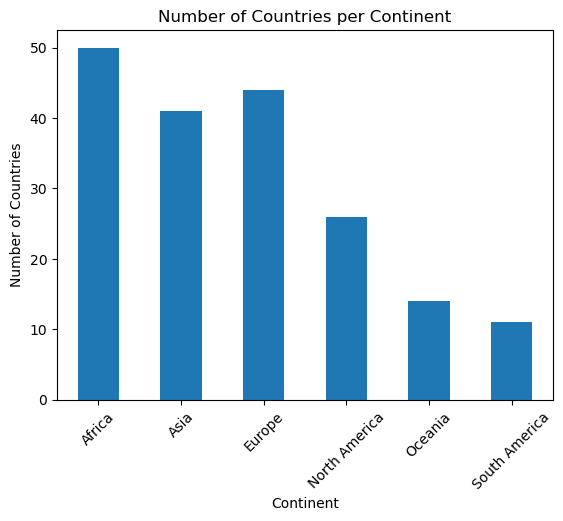

In [240]:
(
    gdp_df.groupby('Continent')['Country']
    .nunique()
    .plot(kind = 'bar',
        ylabel ='Number of Countries', 
        title = 'Number of Countries per Continent'
        )
)
plt.xticks(rotation = 45)                                                      
plt.show()

20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?
    - South America has no outliers. While Europe has the largest outlier. 
    - For Europe and North America the median seems to be in the middle of the box, but does have some skew to the right. 
    - Asia, Africa, South America and Oceania are all right skewed. 

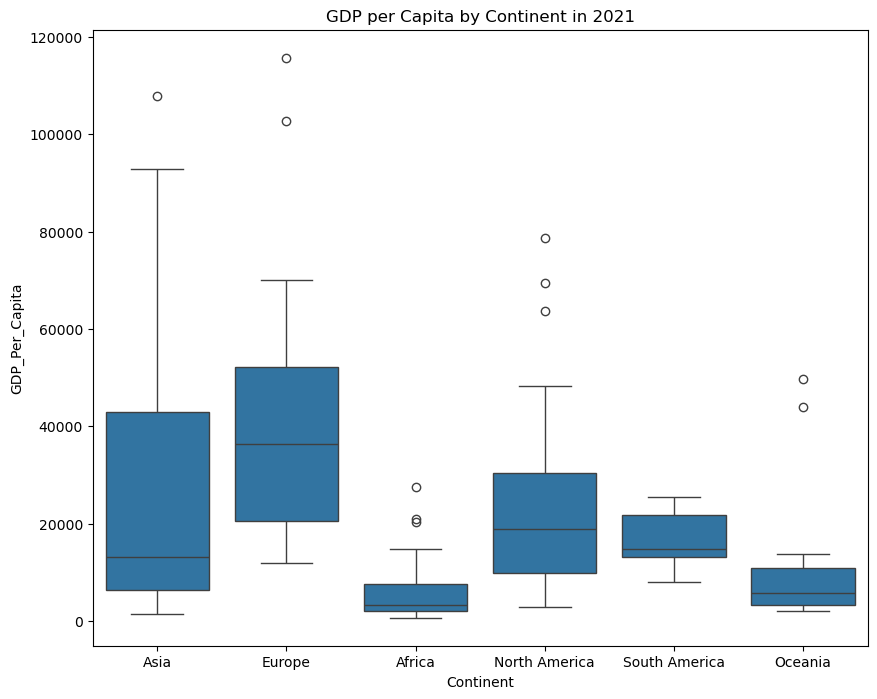

In [245]:
plt.figure(figsize = (10, 8))
sns.boxplot(
    data = gdp_df[gdp_df['Year'] == '2021'], 
    x= 'Continent', 
    y = 'GDP_Per_Capita'
)
plt.title('GDP per Capita by Continent in 2021')
plt.show()

21. Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`. Note: When reading this dataset it, you may encounter an error. Modify your `read_csv` call to correct this **without modifying the original csv file**.  
    - Life Expectancy was downloaded 10/12/24 from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). The first top rows were not needed, so started reading csv a few rows down on the header row. 

In [246]:
life_expectancy = pd.read_csv('../data/life_exp.csv', header = 2)

22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use [`.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

In [247]:
life_expectancy = life_expectancy.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'])

In [256]:
life_expectancy = pd.melt(life_expectancy, 
                          id_vars = ['Country Name'], 
                          var_name = 'Year', 
                          value_name = 'Life_Expectancy')


,Country Name,Year,Life_Expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000


23. What was the first country with a life expectancy to exceed 80?
    - Japan

In [259]:
life_expectancy.loc[life_expectancy['Life_Expectancy'] > 80].head(1)


,Country Name,Year,Life_Expectancy
9695,Japan,1996,80.219756


24. Merge `gdp_df` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [274]:
gdp_le = pd.merge(
    left = gdp_df, 
    right = life_expectancy[['Country Name', 'Year', 'Life_Expectancy']].rename(columns =  {'Country Name': 'Country'}), 
    left_on = ['Country', 'Year'], 
    right_on = ['Country', 'Year'], 
    how = 'inner', 
    validate = 'many_to_one')


25. Create a new DataFrame, named `gdp_le_2021` by extracting data for the year 2021 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2021?
    - 31 countries had a life expectancy of at least 80 in 2021.


In [332]:
gdp_le_2021 = gdp_le.loc[gdp_le['Year'] == '2021']


In [319]:
(gdp_le_2021['Life_Expectancy'] > 80).value_counts()

Life_Expectancy
False    144
True      31
Name: count, dtype: int64

26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a [seaborn FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [320]:
top_three = gdp_le_2021.nlargest(3, 'GDP_Per_Capita')['Country']
# to find the top three countries by gdp per capita, assigned to variable to use in facet grid

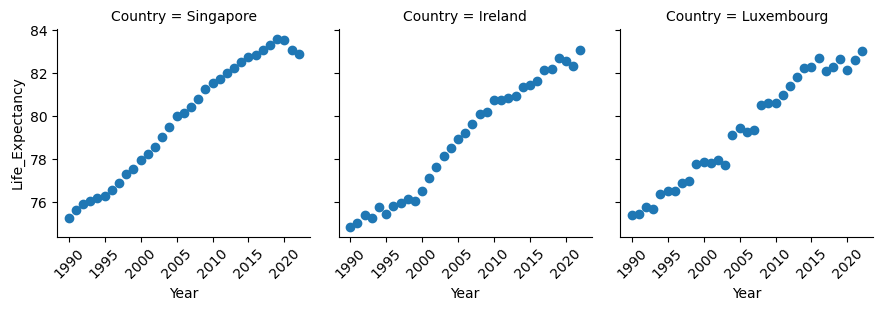

In [323]:
g = sns.FacetGrid(gdp_le.loc[gdp_le['Country'].isin(top_three)].sort_values('Year'),
                  col = 'Country')
g.map(plt.scatter, #scatter plot 
#   commented out the line below but I did it to make change from scatter to line easier to do 
# g.map(sns.lineplot, # if wanted to use a line plot
      'Year', 
      'Life_Expectancy')
plt.xticks(np.arange(0, 32, step = 5))
g.tick_params(axis='x', rotation = 45)
# needed to change years to they were not bunched together

27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?
    - There is a positive trend between GDP per capita and life expectancy. The higher the GDP the logner the life expectancy, up until 70k.

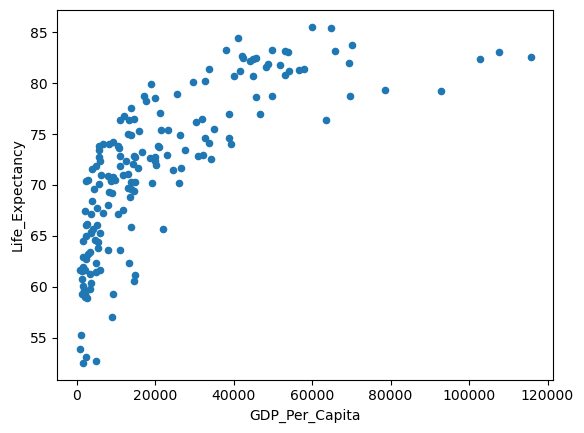

In [324]:
gdp_le_2021.plot(
    kind = 'scatter', 
    x = 'GDP_Per_Capita',
    y = 'Life_Expectancy' 
)
plt.show()

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?
    - The correlation the relationship between two things. The closer the number is to one means it has a postive linear relationship, negative one is a negative linear relationship. The closer the value is to zero indicates there is no linear relationship. 
    - The correlation between life expectancy and gdp per capita is .745, which is a strong postive relationship between the two.

In [325]:
gdp_le_2021[['Life_Expectancy', 'GDP_Per_Capita']].corr()

,Life_Expectancy,GDP_Per_Capita
Life_Expectancy,1.000000,0.745081
GDP_Per_Capita,0.745081,1.000000


29. Add a column to `gdp_le_2021` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.
    - The correlation between life expectancy and gdp per capita is .846, which is a strong postive relationship between the two. Using the log value it increased the relationship by .1, the log value normalizes the data some by compressing the scale so the value differences are reduced. When comparing the two scatterplots, you can see the plots in the log graph are more in the center of the graph and have a less of a curve in the plot.

In [338]:
gdp_le_2021 = pd.DataFrame(gdp_le_2021)
# This is needed due to warning received. Should have reset the index when created, I tried it didnt work and still got the error. 

In [334]:
gdp_le_2021['log_GDP_Per_Capita'] = np.log(gdp_le_2021['GDP_Per_Capita'])

In [337]:
gdp_le_2021[['Life_Expectancy', 'log_GDP_Per_Capita']].corr()

,Life_Expectancy,log_GDP_Per_Capita
Life_Expectancy,1.000000,0.846575
log_GDP_Per_Capita,0.846575,1.000000


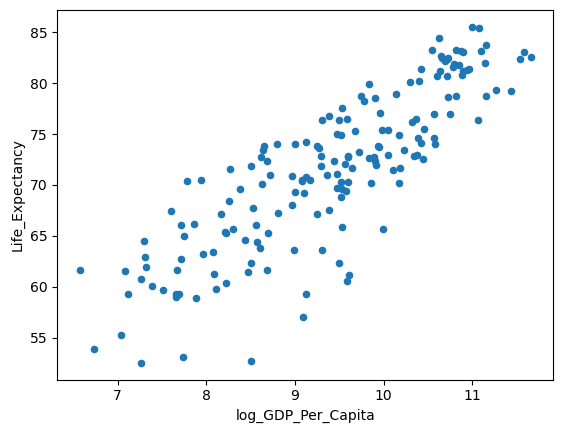

In [336]:
gdp_le_2021.plot(
    kind = 'scatter', 
    x = 'log_GDP_Per_Capita',
    y = 'Life_Expectancy'
)
plt.show()

### Bonus: Solo Exploration:
1. Choose and download another data set from the UN data [http://data.un.org/Explorer.aspx](http://data.un.org/Explorer.aspx) to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Report any interesting correlations or trends that you find. 

2.    If time allows, check out the plotly library to add additional interativity to your plots. [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/).
